In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "D:\\Bootcamp\\MIMIC IV\\"

# Basic EDA - Admissions

**Exploratory Questions:**
- How many patients visited the hospital?
- How many patients died?
- What are the descriptive statistics of language, ethnicity, etc.?
- What were the types of admissions?
- What was the average visit time?
- How many repeat visits were there?
- For revisit patients, what was the average number of visits?
- Are revisit patients more likely to die than single visit patients?

In [3]:
admissions = pd.read_csv(path + "core\\admissions.csv.gz", compression='gzip')

In [4]:
admissions.shape

(524520, 15)

In [280]:
admissions.head(20)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,pos_subj,pos_adm
0,12427812,21593330,2184-01-06 11:51:00,2184-01-10 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,0,0,0
1,14029832,22059088,2120-01-18 01:28:00,2120-01-20 16:13:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,NaN,OTHER,NaN,NaN,0,0,0
2,14495017,22484010,2175-01-28 15:41:00,2175-01-29 16:00:00,NaN,DIRECT EMER.,PHYSICIAN REFERRAL,HOME,Other,?,NaN,WHITE,NaN,NaN,0,0,0
3,13676048,23865469,2193-01-19 05:27:00,2193-01-24 18:59:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,WHITE,NaN,NaN,0,0,0
4,13831972,27763544,2131-01-27 04:03:00,2131-01-27 05:39:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicaid,ENGLISH,SINGLE,WHITE,2131-01-26 22:19:00,2131-01-27 05:39:00,0,0,0
5,18523038,25414328,2142-08-26 17:14:00,2142-08-27 10:00:00,NaN,DIRECT OBSERVATION,PROCEDURE SITE,NaN,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0,0,0
6,16705931,20580522,2174-10-24 11:30:00,2174-10-24 18:45:00,NaN,DIRECT OBSERVATION,PHYSICIAN REFERRAL,NaN,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,0,0
7,19963742,24951506,2171-07-04 15:58:00,2171-07-05 13:37:00,NaN,AMBULATORY OBSERVATION,PACU,NaN,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0,0,0
8,10903424,22568585,2181-01-31 13:09:00,2181-01-31 13:42:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0,0,0
9,15030422,21975876,2149-09-21 23:54:00,2149-09-22 03:59:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0,0,0


In [6]:
admissions.language.value_counts()

ENGLISH    478289
?           46231
Name: language, dtype: int64

In [7]:
admissions.ethnicity.value_counts()

WHITE                            338044
BLACK/AFRICAN AMERICAN            80526
HISPANIC/LATINO                   29887
OTHER                             26844
ASIAN                             24522
UNKNOWN                           19419
UNABLE TO OBTAIN                   3742
AMERICAN INDIAN/ALASKA NATIVE      1536
Name: ethnicity, dtype: int64

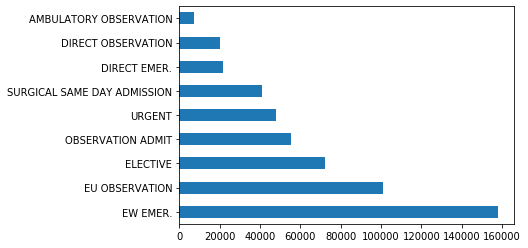

In [8]:
admissions.admission_type.value_counts().plot(kind='barh')

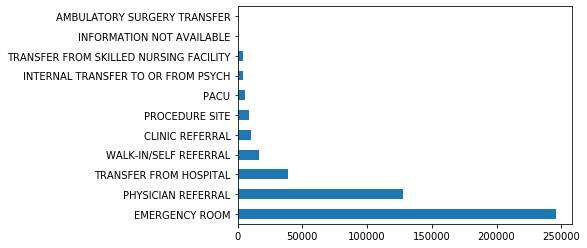

In [9]:
admissions.admission_location.value_counts().plot(kind='barh')

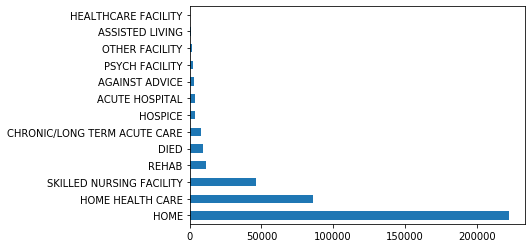

In [10]:
admissions.discharge_location.value_counts().plot(kind='barh')

In [11]:
print('Total number of patients that visited the hospital: %i' % admissions.subject_id.nunique())

Total number of patients that visited the hospital: 257366


In [12]:
print('Total number of patients that died at the hospital: %i' % admissions[admissions.hospital_expire_flag == 1].subject_id.nunique())

Total number of patients that died at the hospital: 9362


In [13]:
readmissions = np.sum(admissions.groupby('subject_id').agg({'hadm_id':'count'}).apply(lambda x: x > 1))
print('Number of patients who were readmitted at least once: %i' % readmissions)

Number of patients who were readmitted at least once: 85927


In [14]:
readmissions2 = admissions.groupby('subject_id').agg({'hadm_id':'count'})
readmissions2 = np.mean(readmissions2[readmissions2['hadm_id'] > 1])
print('Average number of visits for readmitted patients: %.2f' % readmissions2)

Average number of visits for readmitted patients: 4.11


In [15]:
readmissions3 = admissions.groupby('subject_id').agg({'hadm_id':'count', 'hospital_expire_flag':'sum'})
readmissions3['readmitted'] = readmissions3.hadm_id > 1
readmissions3 = readmissions3.groupby('readmitted').agg({'hospital_expire_flag':'mean'})*100
print('Readmitted patients are approximately twice as likely to die that single-visit patients:\n')
print(readmissions3)
# readmissions2 = np.mean(readmissions2[readmissions['hadm_id'] > 1])
# print('Average number of visits for readmitted patients: %.2f' % readmissions2)

Readmitted patients are approximately twice as likely to die that single-visit patients:

            hospital_expire_flag
readmitted                      
False                   2.501764
True                    5.911995


In [16]:
admit = pd.to_datetime(admissions.admittime)
discharge = pd.to_datetime(admissions.dischtime)
stay_time = (discharge - admit).astype('timedelta64[h]')
stay_time = np.mean(stay_time)/24
# # alternate method
# admit = admissions.admittime.apply(pd.Timestamp)
# discharge = admissions.dischtime.apply(pd.Timestamp)
# stay_time = np.mean((discharge - admit).astype('timedelta64[h]'))/24
print('Average time spent at hospital: %.2f days' % stay_time)

Average time spent at hospital: 4.54 days


# Basic EDA - Patients

**Exploratory Questions:**
- What is the distribution of genders and ages?
- Do men or women visit the hospital more often?
- Are men or women more likely to die at the hospital?

In [17]:
patients = pd.read_csv(path + "core\\patients.csv.gz", compression='gzip')

In [18]:
patients.shape

(383220, 6)

In [19]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10002723,F,0,2128,2017 - 2019,NaN
1,10003939,M,0,2184,2008 - 2010,NaN
2,10004222,M,0,2161,2014 - 2016,NaN
3,10005325,F,0,2154,2011 - 2013,NaN
4,10007338,F,0,2153,2017 - 2019,NaN


In [20]:
patients.subject_id.nunique()

383220

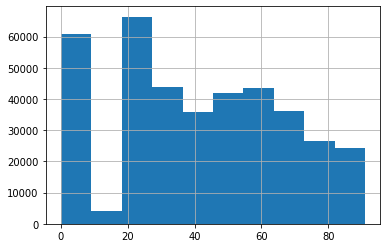

In [21]:
patients.anchor_age.hist()

# Basic EDA - Diagnoses

**Questions:**
- What are the most common diagnoses?
- What conditions affect men vs women?
- Old vs young?
- White vs black, asian, latin, etc.?
- What conditions occur together most frequently? What about least frequrently?
- What conditions require the more hospital visits? What about longer visits?

In [22]:
diagnoses = pd.read_csv(path + "hosp\\diagnoses_icd.csv.gz", compression='gzip')
diag_dict = pd.read_csv(path + "hosp\\d_icd_diagnoses.csv.gz", compression='gzip')
diagnoses.icd_code = pd.read_csv.str.strip()
diag_dict.icd_code = diag_dict.icd_code.str.strip()

In [23]:
diagnoses.shape

(4677924, 5)

In [24]:
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,11603789,25552978,3,65801,9
1,11603789,25552978,4,64881,9
2,11603789,25552978,5,V270,9
3,11603789,25552978,1,65221,9
4,11603789,25552978,2,64421,9


In [25]:
diagnoses.subject_id.nunique()

221122

# Diagnosis Missingness

**Questions:**
- Who are the 40,000 patients who were admitted but did not receive a diagnosis?

In [26]:
adm_diag = admissions.merge(diagnoses, how='outer', on=['hadm_id', 'subject_id'])

In [27]:
adm_diag.isna().sum(axis=0)

subject_id                    0
hadm_id                       0
admittime                     0
dischtime                     0
deathtime               4581667
admission_type                0
admission_location       212657
discharge_location       826598
insurance                     0
language                      0
marital_status           311147
ethnicity                     0
edregtime               1582152
edouttime               1582152
hospital_expire_flag          0
seq_num                   81453
icd_code                  81453
icd_version               81453
dtype: int64

In [28]:
adm_diag[adm_diag.seq_num.isna()].head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,seq_num,icd_code,icd_version
38,19963742,24951506,2171-07-04 15:58:00,2171-07-05 13:37:00,NaN,AMBULATORY OBSERVATION,PACU,NaN,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0,NaN,NaN,NaN
94,13964560,21402253,2148-08-06 00:47:00,2148-08-06 10:25:00,NaN,DIRECT OBSERVATION,PHYSICIAN REFERRAL,NaN,Medicaid,ENGLISH,SINGLE,WHITE,NaN,NaN,0,NaN,NaN,NaN
176,17621453,29787700,2131-09-07 10:20:00,2131-09-11 18:05:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,NaN,NaN,NaN
177,11013901,26621360,2184-06-25 10:24:00,2184-06-27 12:30:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,NaN,NaN,NaN
261,19938687,20997132,2170-06-01 11:26:00,2170-06-03 14:15:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,OTHER,NaN,NaN,0,NaN,NaN,NaN


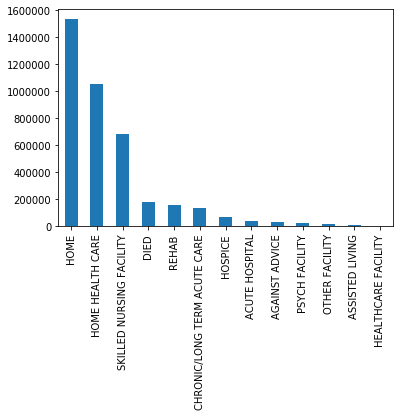

In [29]:
adm_diag.discharge_location.value_counts().plot(kind='bar')

**Conclusion:** There are 50,000 patients who were admitted but were not given an ICD_9/10 diagnosis. Data shows most of these were ER patients who died or were discharged home. There is probably something going on with their insurance where the hospital did not bill the patients directly or they did not have insurance.

# Advanced EDA - AKF

**Questions:**
- How common is AKF?
- How often do patients die with AKF?
- How many times does patient visit before AKF diagnosis?

In [30]:
# akf_codes = ['4280', 'I5032', 'I5033', 'I5022', 'I5023', 'I5030', 'I5021',
#              'I5020', 'I5031', 'I5043', 'I5042', '39891', 'I5041', 'I5040']  # CHF CODES
akf_codes = ['5849', 'N179', '5845', 'N170']  # AKF CODES
diagnoses.icd_code = diagnoses.icd_code.str.strip()
akf_diagnoses = diagnoses[diagnoses.icd_code.isin(akf_codes)]
akf_admissions = admissions.copy()
akf_admissions['akf_subj'] = np.where(akf_admissions.subject_id.isin(akf_diagnoses.subject_id), 1, 0)
akf_admissions['akf_adm'] = np.where(akf_admissions.hadm_id.isin(akf_diagnoses.hadm_id), 1, 0)

In [31]:
akf_admissions.head()
# every patient who has ever been diagnosed with AKF

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,akf_subj,akf_adm
0,12427812,21593330,2184-01-06 11:51:00,2184-01-10 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,0,0,0
1,14029832,22059088,2120-01-18 01:28:00,2120-01-20 16:13:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,NaN,OTHER,NaN,NaN,0,0,0
2,14495017,22484010,2175-01-28 15:41:00,2175-01-29 16:00:00,NaN,DIRECT EMER.,PHYSICIAN REFERRAL,HOME,Other,?,NaN,WHITE,NaN,NaN,0,0,0
3,13676048,23865469,2193-01-19 05:27:00,2193-01-24 18:59:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,WHITE,NaN,NaN,0,0,0
4,13831972,27763544,2131-01-27 04:03:00,2131-01-27 05:39:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicaid,ENGLISH,SINGLE,WHITE,2131-01-26 22:19:00,2131-01-27 05:39:00,0,0,0


In [52]:
akf_admissions[akf_admissions.akf_subj==1].iloc[0:100].subject_id.unique()

array([16705931, 16426569, 13021846, 13964560, 13377780, 18772912,
       13730554, 12830627, 17815790, 10035168, 18965447, 16243079,
       11917817, 10123949, 10187075, 18618339, 17350686, 15642793,
       19792113, 17325001, 15875001, 14859979, 10181023, 14536465,
       11705549, 14342647, 11098956, 11407769, 19645794, 18613213,
       11380311, 17827681, 10734403, 13700728, 12749350, 10921512,
       17316473, 14359524, 13328603, 17402501, 18044722, 10330900,
       14248689, 12835323, 17790720, 11062332, 14693327, 15645139,
       16296962, 16337484, 17038917, 16914073, 18637339, 10171525,
       13834383, 10599715, 14697182, 19052676, 17957832, 15781144,
       12620123, 17310066, 17558625, 16511261, 15782430, 15289024,
       12817942, 13773869, 17963938, 18622324, 13205038, 13508603,
       17478001, 18511092, 11353832, 10580965, 16297597, 11181617,
       17420936, 14612313, 15357196, 13619821, 16613161, 18767945,
       12736437, 11990000, 11714717, 15690806, 10548633, 13753

In [53]:
for subj in akf_admissions[akf_admissions.akf_subj==1].iloc[0:100].subject_id.unique():
    print(subj)
    print('-'*20)
    print(akf_admissions[akf_admissions.subject_id==subj].sort_values('admittime')['akf_adm'], '\n')
# investigate admissions patterns of patients with AKF

16705931
--------------------
50694    0
33076    0
35780    0
46641    0
43033    0
47440    0
28642    0
37316    0
6        0
21921    0
22805    1
12747    0
54929    0
44851    0
65321    0
48097    0
16554    1
51509    0
Name: akf_adm, dtype: int32 

16426569
--------------------
58264    0
50031    0
61115    0
40816    0
16723    0
50699    0
56193    0
21480    0
14       0
8712     0
29197    0
59373    0
7808     0
65330    0
51027    0
35823    0
42789    0
39383    0
15890    0
10305    0
52144    0
15201    0
42818    0
54910    0
11162    0
52603    1
53952    1
30314    0
17878    0
9123     0
38860    0
27239    1
32576    1
Name: akf_adm, dtype: int32 

13021846
--------------------
62875    1
15       0
38671    0
22200    0
48811    0
63475    1
65470    0
47682    0
12075    1
372      0
Name: akf_adm, dtype: int32 

13964560
--------------------
62645    0
16       0
21376    0
18729    0
38610    0
62387    0
34645    0
59102    0
28068    1
45595    1
46925    

7823    0
7306    1
Name: akf_adm, dtype: int32 

15289024
--------------------
8198    0
8327    0
7308    1
Name: akf_adm, dtype: int32 

12817942
--------------------
8550     0
8160     0
7310     0
7460     0
42156    0
23662    0
38217    1
25661    1
55168    0
51520    1
38138    0
28580    0
Name: akf_adm, dtype: int32 

13773869
--------------------
7315    1
Name: akf_adm, dtype: int32 

17963938
--------------------
7316    1
Name: akf_adm, dtype: int32 

18622324
--------------------
7326    1
Name: akf_adm, dtype: int32 

13205038
--------------------
7333    0
7489    1
Name: akf_adm, dtype: int32 

13508603
--------------------
7334    1
8060    1
Name: akf_adm, dtype: int32 

17478001
--------------------
7336     0
29809    1
Name: akf_adm, dtype: int32 

18511092
--------------------
7347    1
Name: akf_adm, dtype: int32 

11353832
--------------------
7348    1
8032    0
Name: akf_adm, dtype: int32 

10580965
--------------------
7359    1
Name: akf_adm, dtype: int3

In [33]:
np.mean(akf_admissions.groupby(['subject_id']).agg({'hadm_id':'nunique'}))
# average number of visits for AKF patients

hadm_id    2.038031
dtype: float64

In [36]:
np.mean(akf_admissions.groupby('subject_id').agg({'akf_adm':'mean'}))
# average percentage of visits where AKF was diagnosed

akf_adm    0.066415
dtype: float64

In [37]:
np.mean(akf_admissions.groupby('subject_id').agg({'hospital_expire_flag':'mean',}))
# How likely are AKF patients to die in a given visit?

hospital_expire_flag    0.02237
dtype: float64

# Basic Feature Engineering

In [145]:
# create dummy df
admissions_sample = akf_admissions[['subject_id', 'hadm_id', 'akf_subj']].iloc[10000:20000]

In [146]:
admissions_sample = admissions_sample.merge(admissions[['hadm_id', 'ethnicity']], how='left', on='hadm_id')

In [147]:
admissions_sample = admissions_sample.merge(patients[['subject_id', 'gender', 'anchor_age']], how='left', on='subject_id')

In [168]:
admissions_sample.loc[admissions_sample.ethnicity=='UNABLE TO OBTAIN', 'ethnicity'] = 'UNKNOWN'

In [148]:
admissions_sample = admissions_sample.rename(columns={'anchor_age':'age'})

In [150]:
admissions_sample = admissions_sample[admissions_sample.age > 0]

Text(0.5, 1.0, 'Age Distribution')

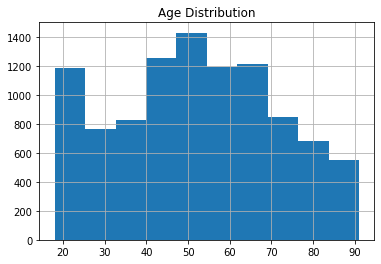

In [174]:
admissions_sample.age.hist()
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender Distribution')

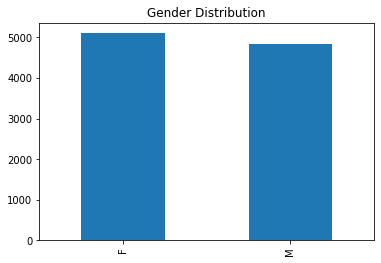

In [175]:
admissions_sample.gender.value_counts().plot(kind='bar')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Ethnicity Distribution')

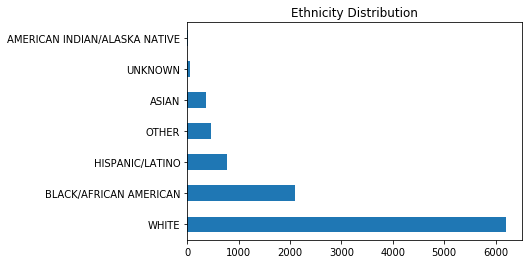

In [172]:
admissions_sample.ethnicity.value_counts().plot(kind='barh')
plt.title('Ethnicity Distribution')

In [127]:
np.sum(admissions_sample.isna(), axis=0)

subject_id    0
hadm_id       0
akf_subj      0
ethnicity     0
gender        0
age           0
dtype: int64

In [152]:
admissions_sample.head()

,subject_id,hadm_id,akf_subj,ethnicity,gender,age
0,12228200,21158459,0,WHITE,M,20
1,15199384,25774285,1,WHITE,M,34
2,17067578,29801652,0,BLACK/AFRICAN AMERICAN,M,31
3,10520647,24884327,0,WHITE,M,48
4,18702997,24753100,0,WHITE,M,51


In [86]:
admissions_sample.subject_id.nunique()

986

In [287]:
admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,pos_subj,pos_adm
0,12427812,21593330,2184-01-06 11:51:00,2184-01-10 11:45:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,NaN,UNKNOWN,NaN,NaN,0,0,0
1,14029832,22059088,2120-01-18 01:28:00,2120-01-20 16:13:00,NaN,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,NaN,OTHER,NaN,NaN,0,0,0
2,14495017,22484010,2175-01-28 15:41:00,2175-01-29 16:00:00,NaN,DIRECT EMER.,PHYSICIAN REFERRAL,HOME,Other,?,NaN,WHITE,NaN,NaN,0,0,0
3,13676048,23865469,2193-01-19 05:27:00,2193-01-24 18:59:00,NaN,URGENT,PHYSICIAN REFERRAL,HOME,Other,?,MARRIED,WHITE,NaN,NaN,0,0,0
4,13831972,27763544,2131-01-27 04:03:00,2131-01-27 05:39:00,NaN,EU OBSERVATION,EMERGENCY ROOM,NaN,Medicaid,ENGLISH,SINGLE,WHITE,2131-01-26 22:19:00,2131-01-27 05:39:00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524515,17892964,20786062,2180-09-17 00:00:00,2180-09-18 13:37:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,SINGLE,WHITE,NaN,NaN,0,0,0
524516,17137572,20943099,2147-08-01 17:41:00,2147-08-02 17:30:00,NaN,EW EMER.,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,DIVORCED,HISPANIC/LATINO,2147-07-31 23:55:00,2147-08-01 19:37:00,0,0,0
524517,19389857,23176714,2189-03-01 00:58:00,2189-03-02 15:22:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,0,0
524518,12298845,22347500,2138-05-31 00:00:00,2138-06-04 16:50:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0,0,0


# Advanced EDA - Lab Tests (Target Subjects)

In [1]:
# repeat setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###############################

path = "D:\\Bootcamp\\MIMIC IV\\"
admissions = pd.read_csv(path + "core\\admissions.csv.gz", compression='gzip')
diagnoses = pd.read_csv(path + "hosp\\diagnoses_icd.csv.gz", compression='gzip')
d_diagnoses = pd.read_csv(path + "hosp\\d_icd_diagnoses.csv.gz", compression='gzip')
d_lab_events = pd.read_csv(path + "hosp\\d_labitems.csv.gz", compression='gzip')

In [2]:
# basic feature engineering for identifying positive cases
pos_codes = d_diagnoses[(d_diagnoses['long_title'].str.lower().str.contains('congestive',)) & (d_diagnoses['long_title'].str.lower().str.contains('heart'))]
pos_diagnoses = diagnoses[diagnoses['icd_code'].isin(pos_codes.icd_code)]
admissions['pos_subj'] = np.where(admissions.subject_id.isin(pos_diagnoses.subject_id), 1, 0)
admissions['pos_adm'] = np.where(admissions.hadm_id.isin(pos_diagnoses.hadm_id), 1, 0)
admissions['admittime'] = pd.to_datetime(admissions.admittime)
admissions['dischtime'] = pd.to_datetime(admissions.dischtime)

In [5]:
# generate samples for pulling lab tests

# create dataframes for first positive visits and most recent previous visits
first_admissions = admissions.iloc[admissions[admissions.pos_subj==1].groupby('subject_id').admittime.idxmin()]
subj_list = first_admissions[first_admissions.pos_adm==0].subject_id.unique()

# create refernce dataframe
subj_admissions = admissions[admissions.subject_id.isin(subj_list)]
subj_admissions = subj_admissions.sort_values(['subject_id', 'admittime']).reset_index(drop=True)
pos_admissions = subj_admissions[['subject_id', 'hadm_id', 'admittime', 'pos_adm']]
pos_admissions = pos_admissions.loc[pos_admissions[pos_admissions.pos_adm==1].groupby('subject_id').admittime.idxmin()]
pos_admissions = pos_admissions.rename(columns={'pos_adm':'first_pos'}).drop('admittime', axis=1)
subj_admissions = subj_admissions.merge(pos_admissions, how='left')

# slice based on first visit/prior visit
first_idx = subj_admissions[subj_admissions.first_pos==1].index
pos_admissions = subj_admissions.iloc[first_idx].reset_index(drop=True)
pre_admissions = subj_admissions.iloc[first_idx-1].reset_index(drop=True)
pre_admissions['time_delta'] = pos_admissions.admittime - pre_admissions.dischtime
pre_admissions = pre_admissions[pre_admissions.time_delta < pd.to_timedelta('365 days')].reset_index(drop=True)
pos_admissions = pos_admissions[pos_admissions.subject_id.isin(pre_admissions.subject_id)].reset_index(drop=True)

pre_hadm = pre_admissions.hadm_id.values
pos_hadm = pos_admissions.hadm_id.values

# sample negative patients
neg_hadm = admissions[(admissions.pos_subj==0) & (admissions.admittime < pd.to_datetime('2210'))].hadm_id.unique()
neg_hadm = np.random.choice(neg_hadm, pre_admissions.subject_id.nunique(), replace=False)

#sanity checks
print('Positive cases in previous visit: ', pre_admissions.pos_adm.sum())
print('Mismatched patient count: ', np.sum(pos_admissions['subject_id'] - pre_admissions['subject_id']))
print('Length of all samples is the same:')
print(len(pre_hadm), len(pos_hadm), len(neg_hadm))
print('Are there any overlapping visits?')
print(pos_hadm in pre_hadm, pos_hadm in neg_hadm, pre_hadm in neg_hadm)

Positive cases in previous visit:  0
Mismatched patient count:  0
Length of all samples is the same:
5210 5210 5210
Are there any overlapping visits?
False False False


In [6]:
sample_hadm = np.concatenate((pre_hadm, pos_hadm, neg_hadm))

In [7]:
# %%time
# # load all tests in sample and save to file for reference

# chunksize = 3*(10 ** 6)
# chunk = 1
# cols_ = ['subject_id', 'hadm_id', 'specimen_id', 'itemid', 'value', 'valuenum', 'valueuom', \
#          'ref_range_lower', 'ref_range_upper', 'comments']
# lab_events = []
# for lab_chunk in pd.read_csv(path + "hosp\\labevents.csv.gz", compression='gzip', chunksize=chunksize):
#     lab_chunk = lab_chunk[lab_chunk.hadm_id.isin(sample_hadm)]
#     lab_chunk = lab_chunk[cols_]
#     lab_events.append(lab_chunk)
#     print(f'Processed chunk: {chunk}')
#     chunk += 1

# lab_events = pd.concat(lab_events)
# lab_events.to_pickle("lab_events.pkl")

Processed chunk: 1
Processed chunk: 2
Processed chunk: 3


<string>:2: DtypeWarning: Columns (7,9,12) have mixed types.Specify dtype option on import or set low_memory=False.


Processed chunk: 4
Processed chunk: 5
Processed chunk: 6
Processed chunk: 7
Processed chunk: 8
Processed chunk: 9


<string>:2: DtypeWarning: Columns (9,12) have mixed types.Specify dtype option on import or set low_memory=False.


Processed chunk: 10


<string>:2: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.


Processed chunk: 11
Processed chunk: 12


KeyboardInterrupt: 

In [9]:
lab_events = pd.read_pickle("lab_events.pkl")
print(lab_events.shape)
lab_events.head()

(3053465, 11)


,subject_id,hadm_id,specimen_id,itemid,value,valuenum,valueuom,ref_range_lower,ref_range_upper,priority,comments
5781,12457664,28483759.0,73683,51221,22.8,22.8,%,40.0,51.0,STAT,NaN
5782,12457664,28483759.0,73683,51222,8.0,8.0,g/dL,13.7,17.5,STAT,NaN
5783,12457664,28483759.0,73683,51248,31.5,31.5,pg,26.0,32.0,STAT,NaN
5784,12457664,28483759.0,73683,51249,35.1,35.1,g/dL,32.0,37.0,STAT,NaN
5785,12457664,28483759.0,73683,51250,90,90.0,fL,82.0,98.0,STAT,NaN


In [10]:
lab_events['group'] = '0: Negative'
lab_events.group.loc[lab_events.hadm_id.isin(pre_hadm)] = '1: Pre-Positive'
lab_events.group.loc[lab_events.hadm_id.isin(pos_hadm)] = '2: Positive'

D:\Software\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
# sample patients to look at how many tests have been run
a = lab_events.sample()['subject_id'].values[0]
lab_events[lab_events.subject_id==a]

,subject_id,hadm_id,specimen_id,itemid,value,valuenum,valueuom,ref_range_lower,ref_range_upper,priority,comments,group
2433268,14497592,26945632.0,21869389,50802,-3,-3.0,mEq/L,NaN,NaN,NaN,NaN,0: Negative
2515368,14497592,26945632.0,35030074,50803,18,18.0,mEq/L,21.0,30.0,NaN,NaN,0: Negative
2515369,14497592,26945632.0,35030074,50806,104,104.0,mEq/L,100.0,112.0,NaN,NaN,0: Negative
2515370,14497592,26945632.0,35030074,50809,177,177.0,mg/dL,70.0,105.0,NaN,NaN,0: Negative
2515371,14497592,26945632.0,35030074,50813,3.3,3.3,mmol/L,0.5,2.0,NaN,NaN,0: Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
28780975,14497592,26945632.0,89737952,51519,NONE,NaN,NaN,NaN,NaN,ROUTINE,NaN,0: Negative
28929496,14497592,26945632.0,53003362,50999,NEG,NaN,NaN,NaN,NaN,STAT,POSITIVE TRICYCLIC RESULTS REPRESENT POTENTIAL...,0: Negative
29982211,14497592,26945632.0,42984064,52028,ART.,NaN,NaN,NaN,NaN,NaN,ART.,0: Negative
29982213,14497592,26945632.0,57622814,52028,ART.,NaN,NaN,NaN,NaN,NaN,ART.,0: Negative


In [12]:
admissions[admissions.subject_id==a]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,pos_subj,pos_adm
423115,14497592,22354976,2172-08-20 17:59:00,2172-08-22 13:36:00,NaN,OBSERVATION ADMIT,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2172-08-20 11:46:00,2172-08-20 19:07:00,0,0,0
436877,14497592,24242190,2172-12-07 07:15:00,2172-12-08 14:20:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,NaN,NaN,0,0,0
453154,14497592,20841399,2172-12-13 14:45:00,2172-12-17 13:50:00,NaN,DIRECT EMER.,CLINIC REFERRAL,HOME,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,NaN,NaN,0,0,0
456139,14497592,26945632,2171-12-14 00:33:00,2171-12-18 13:00:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2171-12-13 23:28:00,2171-12-14 00:08:00,0,0,0


In [69]:
lab_events.groupby('group').agg(tot_lab=('subject_id','count'), labs_pp=('subject_id',lambda x: x.count()//5210))

,tot_lab,labs_pp
group,,
0: Negative,547849,105
1: Pre-Positive,952509,182
2: Positive,1553107,298


In [70]:
labs_pp = lab_events.groupby(['group','subject_id']).agg(n_labs=('hadm_id','count'))

Text(0, 0.5, 'Count of Patients')

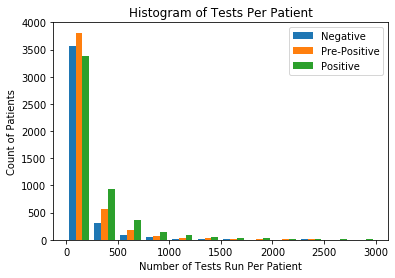

In [71]:
plt.hist([labs_pp.loc['0: Negative'].n_labs.tolist(),\
          labs_pp.loc['1: Pre-Positive'].n_labs.tolist(),\
          labs_pp.loc['2: Positive'].n_labs.tolist()],\
          bins = 12, range = (0,3000))
plt.legend(('Negative','Pre-Positive','Positive'))
plt.title('Histogram of Tests Per Patient')
plt.xlabel('Number of Tests Run Per Patient')
plt.ylabel('Count of Patients')

Text(0, 0.5, 'Count of Patients')

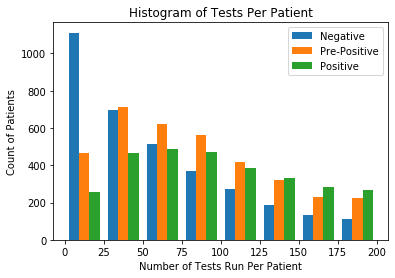

In [72]:
plt.hist([labs_pp.loc['0: Negative'].n_labs.tolist(),\
          labs_pp.loc['1: Pre-Positive'].n_labs.tolist(),\
          labs_pp.loc['2: Positive'].n_labs.tolist()],\
          bins = 8, range = (0,200))
plt.legend(('Negative','Pre-Positive','Positive'))
plt.title('Histogram of Tests Per Patient')
plt.xlabel('Number of Tests Run Per Patient')
plt.ylabel('Count of Patients')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217CCA74EC8>]],
      dtype=object)

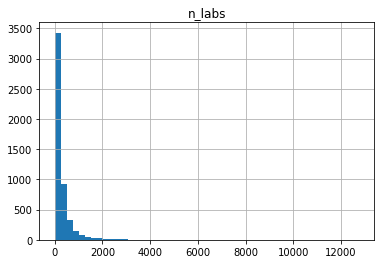

In [73]:
labs_pp.loc['2: Positive'].hist(bins=50)

In [160]:
# most common tests in each category and % missingness?

top_labs= lab_events.groupby(['group', 'itemid']).agg(freq=('subject_id',lambda x: len(np.unique(x))*1000//5210/10 )).reset_index()
top_labs = top_labs.merge(d_lab_events, how='left', on='itemid')
top_labs = top_labs.sort_values(['group', 'freq'], ascending=[True, False]).groupby('group').head(25)
top_labs = top_labs.itemid.unique()
top_labs = lab_events[lab_events.itemid.isin(top_labs)]
top_labs['value'] = top_labs.value.str.extract('(\d+)').fillna('NaN').astype(float)
def kurt(x):
    return pd.DataFrame(x).kurtosis()
top_labs = top_labs.groupby(['group', 'itemid']).agg({'value':['mean', 'median', 'var', 'std', 'skew', kurt, 'count', 'max', 'min']}).reset_index().sort_values(['itemid', 'group'])
top_labs = top_labs.set_index(['group', 'itemid'])['value'].reset_index()
top_labs = top_labs.merge(d_lab_events[['itemid', 'label']], how='left', on='itemid')
top_labs.head(20)

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,group,itemid,mean,median,var,std,skew,kurt,count,max,min,label
0,0: Negative,50861,97.666201,31.0,110949.523920,333.090864,11.242327,173.885944,5006,8331.0,1.0,Alanine Aminotransferase (ALT)
1,1: Pre-Positive,50861,82.213928,25.0,101977.069269,319.338487,12.984585,224.451666,7381,8805.0,0.0,Alanine Aminotransferase (ALT)
2,2: Positive,50861,86.269721,26.0,87280.636702,295.432965,10.549618,155.088694,12309,7520.0,0.0,Alanine Aminotransferase (ALT)
3,0: Negative,50868,13.752888,13.0,12.573827,3.545959,1.394114,6.114635,13504,51.0,0.0,Anion Gap
4,1: Pre-Positive,50868,14.102356,14.0,11.639200,3.411627,0.868041,2.618728,23682,55.0,3.0,Anion Gap
5,2: Positive,50868,14.180679,14.0,13.148919,3.626144,1.025208,5.319205,39728,77.0,0.0,Anion Gap
6,0: Negative,50882,24.842462,25.0,16.810671,4.100082,-0.066130,1.510677,16377,49.0,3.0,Bicarbonate
7,1: Pre-Positive,50882,25.390071,25.0,20.543481,4.532492,0.339060,1.291520,29187,50.0,6.0,Bicarbonate
8,2: Positive,50882,26.015558,26.0,24.905045,4.990495,0.287531,0.956930,49234,50.0,3.0,Bicarbonate
9,0: Negative,50885,3.580000,1.0,53.217570,7.295037,4.181863,23.048432,6100,75.0,0.0,"Bilirubin, Total"


In [168]:
a = top_labs.loc['Anion Gap']

In [170]:
a = a.iloc[0]

In [175]:
a['mean']

82.21392765207966

In [278]:
top_labs.loc['Potassium']

,group,itemid,mean,median,var,std,skew,kurt,count,max,min
label,,,,,,,,,,,
Potassium,0: Negative,50971,3.638763,4.0,0.465059,0.681952,1.244807,7.884148,15494,13.0,1.0
Potassium,1: Pre-Positive,50971,3.733115,4.0,0.455679,0.675040,0.772362,2.753739,27761,10.0,1.0
Potassium,2: Positive,50971,3.715687,4.0,0.479664,0.692578,0.824299,2.716221,45464,10.0,1.0


In [274]:
def get_score(b, a):
    score = (a['mean'] - b['mean']) 
    score = score / pow((a['std']**2 + b['std']**2)/2, 0.5)
    score = score / pow((1/a['count'] + 1/b['count']), 0.5)
    return score
# top_lab_names = top_labs.label.unique()
# top_labs = top_labs.set_index('label')
for lab in top_lab_names:
    print(lab,'\n','-'*30)
    a = top_labs.loc[lab].iloc[0]
    b = top_labs.loc[lab].iloc[1]
    c = top_labs.loc[lab].iloc[2]
    score_ab = get_score(a, b)
    score_bc = get_score(b, c)
#     score_ac = get_score(a, c)
    
    print('Relative Change 0 -> 1:  %.2f' % score_ab)
    print('Relative Change 1 -> 2:  %.2f' % score_bc)
#     print('Relative Change 0 -> 2:  %.2f' % score_ac)
    if np.abs(score_ab) > np.abs(score_bc):
        print('** this could be good')
    print('')

Alanine Aminotransferase (ALT) 
 ------------------------------
Relative Change 0 -> 1:  -2.59
Relative Change 1 -> 2:  0.90
** this could be good

Anion Gap 
 ------------------------------
Relative Change 0 -> 1:  9.31
Relative Change 1 -> 2:  2.71
** this could be good

Bicarbonate 
 ------------------------------
Relative Change 0 -> 1:  12.98
Relative Change 1 -> 2:  17.76

Bilirubin, Total 
 ------------------------------
Relative Change 0 -> 1:  -24.31
Relative Change 1 -> 2:  1.94
** this could be good

Calcium, Total 
 ------------------------------
Relative Change 0 -> 1:  -0.97
Relative Change 1 -> 2:  5.14

Chloride 
 ------------------------------
Relative Change 0 -> 1:  -14.90
Relative Change 1 -> 2:  -18.78

Creatinine 
 ------------------------------
Relative Change 0 -> 1:  32.72
Relative Change 1 -> 2:  -2.16
** this could be good

Estimated GFR (MDRD equation) 
 ------------------------------
Relative Change 0 -> 1:  nan
Relative Change 1 -> 2:  nan

Glucose 
 -----

D:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.


In [147]:
if max - min < mean(std)
top_labs.set_index('label').loc['Anion Gap']['mean'].min()

13.752888033175356

In [1]:
top_labs

NameError: name 'top_labs' is not defined

# Advanced EDA - Co-Morbidities (Target Subjects)

In [201]:
# repeat setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###############################

path = "D:\\Bootcamp\\MIMIC IV\\"
diagnoses = pd.read_csv(path + "hosp\\diagnoses_icd.csv.gz", compression='gzip')
d_diagnoses = pd.read_csv(path + "hosp\\d_icd_diagnoses.csv.gz", compression='gzip')
drg_codes = pd.read_csv(path + "hosp\\drgcodes.csv.gz", compression='gzip')

###############################

diagnoses.icd_code = diagnoses.icd_code.str.strip()
d_diagnoses.icd_code = d_diagnoses.icd_code.str.strip()
drg_codes = drg_codes.drop_duplicates().groupby('hadm_id').first().reset_index()

In [ ]:
((pre_hadm, pos_hadm, neg_hadm))

In [197]:
pre_hadm

array([20321825, 27218502, 29483621, ..., 25942220, 27903188, 23069082],
      dtype=int64)

In [230]:
diag_events = diagnoses.loc[diagnoses.hadm_id.isin(sample_hadm)]

In [231]:
diag_events = diag_events.merge(d_diagnoses, how='left', on=['icd_version', 'icd_code'])

In [232]:
diag_events = diag_events.merge(drg_codes[['hadm_id', 'description']], how='left', on='hadm_id')

In [233]:
diag_events['group'] = '0: Negative'
diag_events.group.loc[diag_events.hadm_id.isin(pre_hadm)] = '1: Pre-Positive'
diag_events.group.loc[diag_events.hadm_id.isin(pos_hadm)] = '2: Positive'

D:\Software\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [238]:
diag_events = diag_events.drop('icd_code', axis=1)
diag_events = diag_events.rename(columns={'long_title':'icd_code', 'description':'drg_code'})
diag_events = diag_events[['group', 'subject_id', 'hadm_id', 'drg_code', 'icd_code', 'seq_num']]

In [240]:
diag_events = diag_events.sort_values(['group', 'hadm_id', 'seq_num'])

In [236]:
diag_events.drg_code = diag_events.drg_code.str.lower()
diag_events.icd_code = diag_events.icd_code.str.lower()

In [242]:
diag_events

,group,subject_id,hadm_id,drg_code,icd_code,seq_num
116885,0: Negative,14546051,20000069,vaginal delivery,second degree perineal laceration during delivery,1
116887,0: Negative,14546051,20000069,vaginal delivery,single live birth,2
116886,0: Negative,14546051,20000069,vaginal delivery,37 weeks gestation of pregnancy,3
152134,0: Negative,16230775,20002506,intracranial hemorrhage,other nontraumatic intracerebral hemorrhage,1
152137,0: Negative,16230775,20002506,intracranial hemorrhage,arteriovenous malformation of cerebral vessels,2
...,...,...,...,...,...,...
116601,2: Positive,13367705,29995484,cardiac congenital & valvular disorders,family history of ischemic heart disease and o...,16
116603,2: Positive,13367705,29995484,cardiac congenital & valvular disorders,"peripheral vascular disease, unspecified",17
116592,2: Positive,13367705,29995484,cardiac congenital & valvular disorders,"bronchiectasis, uncomplicated",18
116587,2: Positive,13367705,29995484,cardiac congenital & valvular disorders,other nonspecific abnormal finding of lung field,19


In [266]:
diag_events.groupby(['group', 'drg_code']).agg(freq=('drg_code', 'count')).sort_values('freq', ascending=False).reset_index().groupby('group').head(8).sort_values(['group', 'freq'], ascending=[True, False])

,group,drg_code,freq
12,0: Negative,"neonate, bwt > 2499g, normal newborn or neonat...",1153
22,0: Negative,septicemia & disseminated infections,868
37,0: Negative,vaginal delivery,554
76,0: Negative,other digestive system diagnoses,376
77,0: Negative,normal newborn,374
101,0: Negative,renal failure,322
106,0: Negative,cesarean delivery,315
110,0: Negative,major small & large bowel procedures,304
7,1: Pre-Positive,septicemia & disseminated infections,1482
16,1: Pre-Positive,other pneumonia,961


In [279]:
diag_events.groupby(['group', 'icd_code']).agg(freq=('icd_code', 'count')).sort_values('freq', ascending=False).reset_index().groupby('group').head(15).sort_values(['group', 'freq'], ascending=[True, False])

,group,icd_code,freq
23,0: Negative,unspecified essential hypertension,706
32,0: Negative,essential (primary) hypertension,601
52,0: Negative,other and unspecified hyperlipidemia,424
53,0: Negative,"hyperlipidemia, unspecified",417
76,0: Negative,esophageal reflux,344
79,0: Negative,personal history of nicotine dependence,335
80,0: Negative,encounter for immunization,335
94,0: Negative,need for prophylactic vaccination and inoculat...,306
97,0: Negative,gastro-esophageal reflux disease without esoph...,297
100,0: Negative,"major depressive disorder, single episode, uns...",291
